# Importing required libraries.

In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display


# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
# For accuracy
from sklearn.metrics import accuracy_score
# first neural network with keras tutorial
from numpy import loadtxt
#from keras.models import Sequential
#from keras.layers import Dense
import xgboost as xgb
import tqdm
#import hyperopt
import sys
import scipy

# check version number
import imblearn


#import lightgbm
#from catboost import Pool, CatBoostClassifier, cv

In [694]:
train = pd.read_csv('train.csv')

In [695]:
test = pd.read_csv('test.csv')

In [696]:
train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [697]:
train.isnull().sum()

ID                      0
sex                     0
Aged                    0
Married                 0
TotalDependents         0
ServiceSpan             0
MobileService           0
4GService               0
CyberProtection         0
HardwareSupport         0
TechnicalAssistance     0
FilmSubscription        0
SettlementProcess       0
QuarterlyPayment        0
GrandPayment           10
CustomerAttrition       0
dtype: int64

In [698]:
test.isnull().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           1
dtype: int64

In [699]:
#col_remove=['Aged','TotalDependents','ServiceSpan','MobileService','SettlementProcess']
#train.drop(labels=col_remove,axis=1,inplace=True)

In [700]:
#Col_removet =['Aged','TotalDependents','ServiceSpan','MobileService','SettlementProcess']
#test.drop(labels=col_remove,axis=1,inplace=True)

In [701]:
train.loc[train['GrandPayment'].isna(),'GrandPayment'] = train['QuarterlyPayment']

In [702]:
test.loc[test['GrandPayment'].isna(),'GrandPayment'] = test['QuarterlyPayment']

In [703]:
#train[train['ServiceSpan']<0]

In [704]:
#test[test['ServiceSpan']<0]

In [705]:
train.shape

(6338, 16)

In [706]:
test.shape

(705, 15)

In [707]:
train.groupby('CustomerAttrition').size()

CustomerAttrition
No     4658
Yes    1680
dtype: int64

Mapping all the required Variables into 1 and 0, also replacing the NA values in Grand Payment with QuarterlyPayment because there is direct relationship between them.

In [708]:
x = train['sex'].map({'Female':0,'Male':1})

In [709]:
train['sex'] = x

In [710]:
train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,0,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,1,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,1,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,1,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,0,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [711]:
test['sex']=test['sex'].map({'Female':0,'Male':1})

In [712]:
A = train['Aged'].map({'No':0,'Yes':1})

In [713]:
train['Aged'] = A

In [714]:
train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,0,0,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,1,0,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,1,1,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,1,0,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,0,0,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [715]:
test['Aged'] = test['Aged'].map({'No':0,'Yes':1})

In [716]:
train['Married'] = train['Married'].map({'No':0,'Yes':1})

In [717]:
test['Married'] = test['Married'].map({'No':0,'Yes':1})

In [718]:
train['TotalDependents'] = train['TotalDependents'].map({'No':0,'Yes':1})

In [719]:
test['TotalDependents'] = test['TotalDependents'].map({'No':0,'Yes':1})

In [720]:
train['MobileService'] = train['MobileService'].map({'No':0,'Yes':1})

In [721]:
test['MobileService'] = test['MobileService'].map({'No':0,'Yes':1})

In [722]:
train['CyberProtection'] = train['CyberProtection'].map({'No':0,'Yes':1})

In [723]:
test['CyberProtection'] = test['CyberProtection'].map({'No':0,'Yes':1})

In [724]:
train['HardwareSupport'] = train['HardwareSupport'].map({'No':0,'Yes':1})

In [725]:
test['HardwareSupport'] = test['HardwareSupport'].map({'No':0,'Yes':1})

In [726]:
train['TechnicalAssistance'] = train['TechnicalAssistance'].map({'No':0,'Yes':1})

In [727]:
test['TechnicalAssistance'] = test['TechnicalAssistance'].map({'No':0,'Yes':1})

In [728]:
train['FilmSubscription'] = train['FilmSubscription'].map({'No':0,'Yes':1})

In [729]:
test['FilmSubscription'] = test['FilmSubscription'].map({'No':0,'Yes':1})

In [730]:
train['CustomerAttrition'] = train['CustomerAttrition'].map({'No':0,'Yes':1})

In [731]:
train['4GService'].unique()

array(['Wifi Broadband', 'Satellite Broadband', 'No'], dtype=object)

In [732]:
#train['4GService'] = train['4GService'].map({'Wifi Broadband':1,'Satellite Broadband':2,'No':0})

In [733]:
#test['4GService'] = test['4GService'].map({'Wifi Broadband':1,'Satellite Broadband':2,'No':0})

In [734]:
train['SettlementProcess'].unique()

array(['Check', 'Bank', 'Card', 'Electronic'], dtype=object)

In [735]:
#train['SettlementProcess'] = train['SettlementProcess'].map({'Check':1,'Bank':2,'Card':3,'Electronic':4})

In [736]:
#test['SettlementProcess'] = test['SettlementProcess'].map({'Check':1,'Bank':2,'Card':3,'Electronic':4})

In [737]:
train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,0,0,0,1,48,1,Wifi Broadband,0,1,1,0,Check,96.259802,4628.129119,1
1,1RUJ7ONYZHYTWKOKO1SD,1,0,1,0,45,1,Wifi Broadband,0,0,0,1,Bank,18.876470,922.085998,0
2,DZ9EEOQWSN0MYCBUPAM5,1,1,1,0,59,1,Wifi Broadband,1,0,1,0,Card,106.016057,6205.891129,1
3,YZ43L1UQUQACTL1PXXZG,1,0,0,0,14,1,Wifi Broadband,0,0,0,0,Check,80.108839,1248.655391,0
4,6P28152QGF60PDLSCB9M,0,0,1,1,25,1,Wifi Broadband,0,1,0,1,Check,51.529773,1285.321277,0


In [738]:
test.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,1,0,0,0,8,1,Wifi Broadband,0,0,0,1,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,0,0,0,0,26,1,Satellite Broadband,0,1,0,1,Check,56.609623,1553.276979
2,IDCQS0CO5P29AMKY3LO1,1,0,0,0,66,1,Satellite Broadband,0,0,0,1,Card,25.167690,1684.262416
3,1IY29SDITYU6IFZ4KJB0,0,1,0,0,31,1,Satellite Broadband,0,0,1,1,Bank,55.560968,1829.874462
4,T5XMW5B0YPCONH30WJD2,0,0,1,1,21,1,Satellite Broadband,0,0,0,0,Bank,20.070002,489.818170


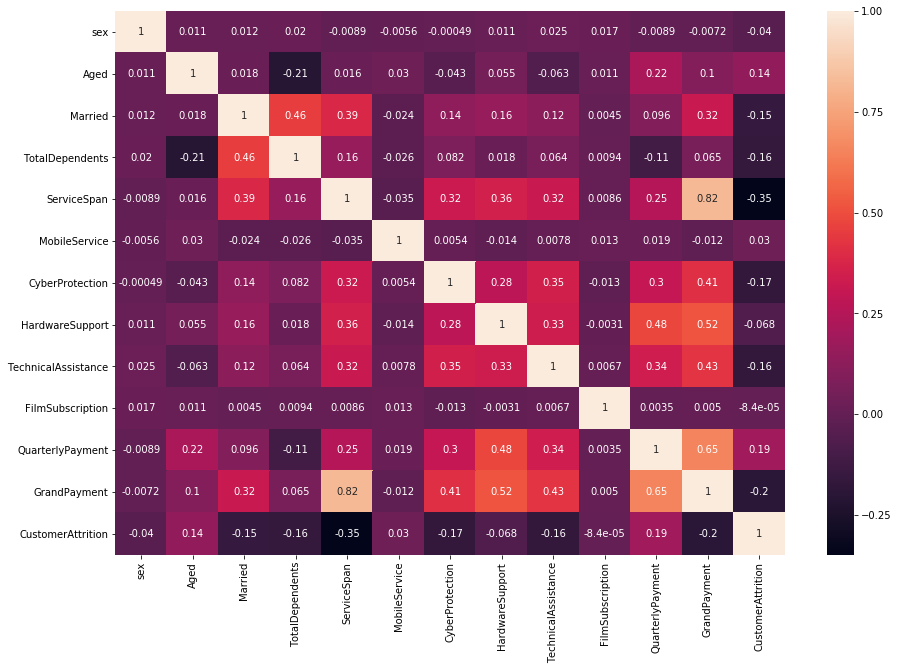

In [739]:
corrmat = train.corr()
top_features = corrmat.index
plt.figure(figsize=(15,10))
sns.heatmap(train[top_features].corr(),annot=True);

In [740]:
print(corrmat['CustomerAttrition'])

sex                   -0.039800
Aged                   0.144672
Married               -0.154822
TotalDependents       -0.162315
ServiceSpan           -0.348284
MobileService          0.030120
CyberProtection       -0.168867
HardwareSupport       -0.068453
TechnicalAssistance   -0.164134
FilmSubscription      -0.000084
QuarterlyPayment       0.189518
GrandPayment          -0.195787
CustomerAttrition      1.000000
Name: CustomerAttrition, dtype: float64


In [741]:
train = pd.get_dummies(data=train, columns=['4GService','SettlementProcess'])

In [742]:
train.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'QuarterlyPayment',
       'GrandPayment', 'CustomerAttrition', '4GService_No',
       '4GService_Satellite Broadband', '4GService_Wifi Broadband',
       'SettlementProcess_Bank', 'SettlementProcess_Card',
       'SettlementProcess_Check', 'SettlementProcess_Electronic'],
      dtype='object')

In [743]:
test = pd.get_dummies(data=test, columns=['4GService','SettlementProcess'])

In [744]:
test.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,WMORTPCG3HTIPEFSGUFY,1,0,0,0,8,1,0,0,0,1,21.299937,151.092519,0,0,1,0,0,1,0
1,GBLPEA16C3KGBO57KEFO,0,0,0,0,26,1,0,1,0,1,56.609623,1553.276979,0,1,0,0,0,1,0
2,IDCQS0CO5P29AMKY3LO1,1,0,0,0,66,1,0,0,0,1,25.167690,1684.262416,0,1,0,0,1,0,0
3,1IY29SDITYU6IFZ4KJB0,0,1,0,0,31,1,0,0,1,1,55.560968,1829.874462,0,1,0,1,0,0,0
4,T5XMW5B0YPCONH30WJD2,0,0,1,1,21,1,0,0,0,0,20.070002,489.818170,0,1,0,1,0,0,0


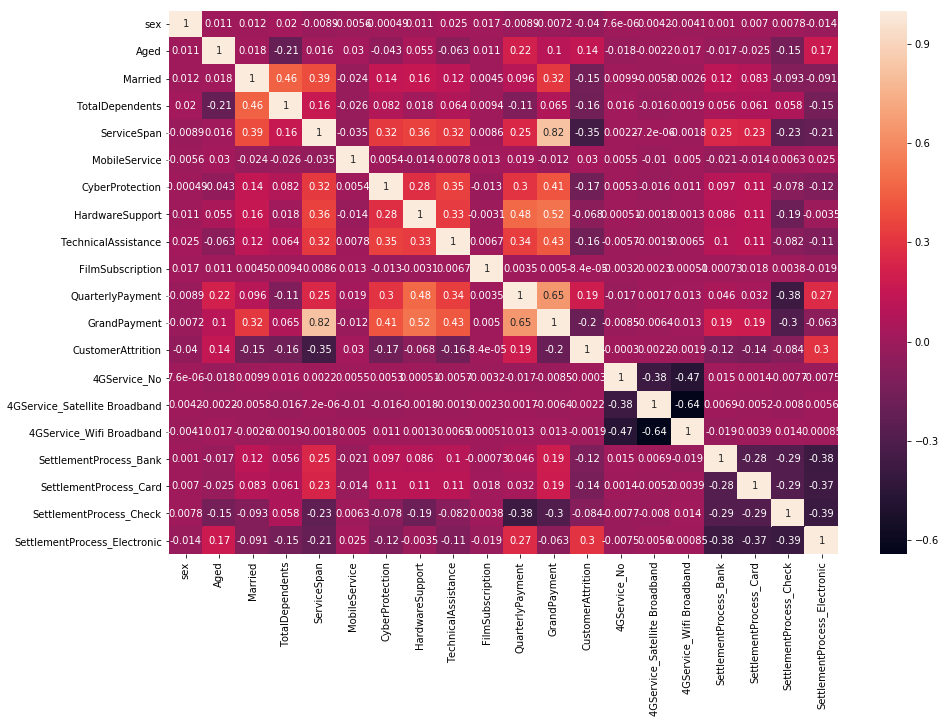

In [745]:
corrmat = train.corr()
top_features = corrmat.index
plt.figure(figsize=(15,10))
sns.heatmap(train[top_features].corr(),annot=True);

In [746]:
print(corrmat['CustomerAttrition'])

sex                             -0.039800
Aged                             0.144672
Married                         -0.154822
TotalDependents                 -0.162315
ServiceSpan                     -0.348284
MobileService                    0.030120
CyberProtection                 -0.168867
HardwareSupport                 -0.068453
TechnicalAssistance             -0.164134
FilmSubscription                -0.000084
QuarterlyPayment                 0.189518
GrandPayment                    -0.195787
CustomerAttrition                1.000000
4GService_No                    -0.000302
4GService_Satellite Broadband    0.002219
4GService_Wifi Broadband        -0.001872
SettlementProcess_Bank          -0.120469
SettlementProcess_Card          -0.135592
SettlementProcess_Check         -0.084314
SettlementProcess_Electronic     0.298295
Name: CustomerAttrition, dtype: float64


In [747]:
#col_remove=['sex','HardwareSupport','FilmSubscription']
#train.drop(labels =col_remove,axis = 1 , inplace = True)

In [748]:
train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,...,QuarterlyPayment,GrandPayment,CustomerAttrition,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,B60LHTZLLPFU4IULNPUF,0,0,0,1,48,1,0,1,1,...,96.259802,4628.129119,1,0,0,1,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,1,0,1,0,45,1,0,0,0,...,18.876470,922.085998,0,0,0,1,1,0,0,0
2,DZ9EEOQWSN0MYCBUPAM5,1,1,1,0,59,1,1,0,1,...,106.016057,6205.891129,1,0,0,1,0,1,0,0
3,YZ43L1UQUQACTL1PXXZG,1,0,0,0,14,1,0,0,0,...,80.108839,1248.655391,0,0,0,1,0,0,1,0
4,6P28152QGF60PDLSCB9M,0,0,1,1,25,1,0,1,0,...,51.529773,1285.321277,0,0,0,1,0,0,1,0


In [749]:
#col_remove_t=['sex','HardwareSupport','FilmSubscription']
#test.drop(labels =col_remove_t,axis = 1 , inplace = True)

In [750]:
test.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,WMORTPCG3HTIPEFSGUFY,1,0,0,0,8,1,0,0,0,1,21.299937,151.092519,0,0,1,0,0,1,0
1,GBLPEA16C3KGBO57KEFO,0,0,0,0,26,1,0,1,0,1,56.609623,1553.276979,0,1,0,0,0,1,0
2,IDCQS0CO5P29AMKY3LO1,1,0,0,0,66,1,0,0,0,1,25.167690,1684.262416,0,1,0,0,1,0,0
3,1IY29SDITYU6IFZ4KJB0,0,1,0,0,31,1,0,0,1,1,55.560968,1829.874462,0,1,0,1,0,0,0
4,T5XMW5B0YPCONH30WJD2,0,0,1,1,21,1,0,0,0,0,20.070002,489.818170,0,1,0,1,0,0,0


In [751]:
#del train['GrandPayment']

In [752]:
#del test['GrandPayment']

In [753]:
#train.head()

In [754]:
#test.head()

In [755]:
#x = train

In [756]:
#col_remove = ['ID','CustomerAttrition']
#x.drop(labels = col_remove,axis=1,inplace=True)

In [757]:
train.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'QuarterlyPayment',
       'GrandPayment', 'CustomerAttrition', '4GService_No',
       '4GService_Satellite Broadband', '4GService_Wifi Broadband',
       'SettlementProcess_Bank', 'SettlementProcess_Card',
       'SettlementProcess_Check', 'SettlementProcess_Electronic'],
      dtype='object')

In [758]:
#feature_names =['Aged', 'Married', 'TotalDependents', 'ServiceSpan',
    #   'MobileService', 'CyberProtection', 'TechnicalAssistance',
   #    'QuarterlyPayment', 'GrandPayment',
  #     '4GService_Satellite Broadband', 'SettlementProcess_Bank',
 #      'SettlementProcess_Card', 'SettlementProcess_Electronic']
#X = train[feature_names]
#y = train.CustomerAttrition

In [759]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=150)

In [760]:
#from imblearn.under_sampling import RandomUnderSampler
#oversample = RandomUnderSampler(sampling_strategy='minority')

In [761]:
# fit and transform the data
#scaled_data = scaler.fit_transform(X)

# Oversampling

In [762]:
train['CustomerAttrition'].value_counts()

0    4658
1    1680
Name: CustomerAttrition, dtype: int64

In [763]:
df_class_1=train[train['CustomerAttrition']==1]
df_class_0=train[train['CustomerAttrition']==0]

In [764]:
df_class_1_over = df_class_1.sample(4658, replace =True)

In [765]:
df_class_1_over.shape

(4658, 21)

# Undersampling

In [766]:
#df_class_0_over = df_class_0.sample(, replace =True)

In [767]:
#df_class_0_over.shape

In [768]:
df_test_over = pd.concat([df_class_0,df_class_1_over], axis = 0)
print('Random over-sampling:')
print(df_test_over.CustomerAttrition.value_counts())

Random over-sampling:
1    4658
0    4658
Name: CustomerAttrition, dtype: int64


In [769]:
y = df_test_over['CustomerAttrition']
X = df_test_over.drop(['CustomerAttrition','ID'],axis=1)


After Oversampling, The important part is to Standardize the data for which mean will be equal to 0 and standard deviation will be 1.

In [677]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [678]:
Featur_num_X_t= X.iloc[:,[10,11]].values

In [679]:
Featur_num_X_t

array([[  18.87647016,  922.0859985 ],
       [  80.10883859, 1248.655391  ],
       [  51.52977334, 1285.321277  ],
       ...,
       [  93.5724047 ,  462.323053  ],
       [  81.53286061, 1853.380412  ],
       [  90.23126562, 2177.290776  ]])

In [680]:
Featur_num_X_t2 = X.iloc[:,[4]].values

In [681]:
del X['ServiceSpan']
del X['QuarterlyPayment']
del X['GrandPayment']


In [682]:
xx = s.fit_transform(Featur_num_X_t)

In [683]:
s = MinMaxScaler(feature_range=(-1,1))
xxx=s.fit_transform(Featur_num_X_t2)

In [684]:
X = np.concatenate((X,xx,xxx), axis=1)

In [685]:
X.shape

(9316, 19)

In [775]:
X.isnull().sum()

sex                              0
Aged                             0
Married                          0
TotalDependents                  0
ServiceSpan                      0
MobileService                    0
CyberProtection                  0
HardwareSupport                  0
TechnicalAssistance              0
FilmSubscription                 0
QuarterlyPayment                 0
GrandPayment                     0
4GService_No                     0
4GService_Satellite Broadband    0
4GService_Wifi Broadband         0
SettlementProcess_Bank           0
SettlementProcess_Card           0
SettlementProcess_Check          0
SettlementProcess_Electronic     0
dtype: int64

In [770]:
from sklearn import ensemble
from sklearn.model_selection import StratifiedKFold, cross_validate

In [776]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_folds)
    stratified_k_fold.get_n_splits(X,y)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y):
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred


In [809]:
test_id = test.ID

In [810]:
del test['ID']

In [367]:
s=StandardScaler()
Featur_num_X_test= test.iloc[:,[10,11]].values
Featur_num_X_test1= test.iloc[:,[4]].values
del test['ServiceSpan']
del test['QuarterlyPayment']
del test['GrandPayment']
x_test = s.fit_transform(Featur_num_X_test)
s=MinMaxScaler(feature_range=(-1,1))
xx_test = s.fit_transform(Featur_num_X_test1)
test = np.concatenate((test,x_test,xx_test), axis=1)

In [401]:
test.shape

(705, 19)

# Random Forest

In [805]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150, stratify=y)

In [806]:
model = RandomForestClassifier(bootstrap=False)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

In [807]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       932
           1       0.90      0.95      0.92       932

    accuracy                           0.92      1864
   macro avg       0.92      0.92      0.92      1864
weighted avg       0.92      0.92      0.92      1864

0.921137339055794


In [808]:
print(confusion_matrix(y_test,predictions))

[[832 100]
 [ 47 885]]


In [800]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)

In [801]:
scores

array([0.94206009, 0.91309013, 0.91845494, 0.9388412 , 0.93133047,
       0.92918455, 0.92373792, 0.91836735, 0.94199785, 0.90655209])

In [373]:
train.corr()['CustomerAttrition']

sex                             -0.039800
Aged                             0.144672
Married                         -0.154822
TotalDependents                 -0.162315
ServiceSpan                     -0.348284
MobileService                    0.030120
CyberProtection                 -0.168867
HardwareSupport                 -0.068453
TechnicalAssistance             -0.164134
FilmSubscription                -0.000084
QuarterlyPayment                 0.189518
GrandPayment                    -0.195787
CustomerAttrition                1.000000
4GService_No                    -0.000302
4GService_Satellite Broadband    0.002219
4GService_Wifi Broadband        -0.001872
SettlementProcess_Bank          -0.120469
SettlementProcess_Card          -0.135592
SettlementProcess_Check         -0.084314
SettlementProcess_Electronic     0.298295
Name: CustomerAttrition, dtype: float64

In [77]:
test_id.dtype

dtype('O')

In [78]:
test_id

0      WMORTPCG3HTIPEFSGUFY
1      GBLPEA16C3KGBO57KEFO
2      IDCQS0CO5P29AMKY3LO1
3      1IY29SDITYU6IFZ4KJB0
4      T5XMW5B0YPCONH30WJD2
5      9BZTYMBY9E0N7PJ9RIXE
6      S8UD0H3GT1RF8PDUTIB4
7      7OIMLC8BT2KAQOXTQXB4
8      CUY8I3DUZMFQ9WKQQWHA
9      J6BA9F4BQBF9J89NNFDM
10     HCE96FQHNJDYEIPADIH4
11     YU8K9OAO0X3DZP9IEEW2
12     YM79ZICKUAYNIJ0XYY2F
13     BG643H6OJ5D7DQD86A7N
14     QFLE5D8WQMJ0SSZ87AZA
15     3X75RRGID6M0GOZ8IBJU
16     1LOPA00K2199GN4CH1PS
17     KN40YX4BM7A1TWC5C8EU
18     450RPE8BBCBKWRJBKCSC
19     WHER1J83FIR0OT02TG2Y
20     KMN55YPQ2O0A8HI4FKHF
21     218JJG5TRNP64KSBIFR4
22     KEFTUS3K74LWKZT460TL
23     AECZGA7TQU6IQDNKXZE2
24     8M85UG8S4TO0MF825QJX
25     WUQ4Q6IN98743GESDZKW
26     6NCPIZ5TASX4M71EX1IY
27     0A42ZZ8IC5Q6TRD45O2I
28     XXDBI2K4TN3R1FUXRZ2T
29     5EQ7KJ1D4M55H89ZSSTQ
               ...         
675    1IPN5IN4QLJD7KPSW9B0
676    A3S9RBY27G28GGL86Q5D
677    MF73LXQFFJ8RHUTINIXU
678    RK014MR21PSAZT7GA21C
679    I9SA90E0TIH1N

In [811]:
p1 =model.predict(test)

In [812]:
FinalSubmission=pd.DataFrame({'ID':test_id,'CustomerAttrition':p1})

In [813]:
FinalSubmission

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,0
1,GBLPEA16C3KGBO57KEFO,0
2,IDCQS0CO5P29AMKY3LO1,0
3,1IY29SDITYU6IFZ4KJB0,0
4,T5XMW5B0YPCONH30WJD2,0
5,9BZTYMBY9E0N7PJ9RIXE,0
6,S8UD0H3GT1RF8PDUTIB4,0
7,7OIMLC8BT2KAQOXTQXB4,1
8,CUY8I3DUZMFQ9WKQQWHA,1
9,J6BA9F4BQBF9J89NNFDM,0


In [814]:
FinalSubmission['CustomerAttrition'] = FinalSubmission['CustomerAttrition'].map({0:'No',1:'Yes'})

In [815]:
FinalSubmission

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No
5,9BZTYMBY9E0N7PJ9RIXE,No
6,S8UD0H3GT1RF8PDUTIB4,No
7,7OIMLC8BT2KAQOXTQXB4,Yes
8,CUY8I3DUZMFQ9WKQQWHA,Yes
9,J6BA9F4BQBF9J89NNFDM,No


In [816]:
FinalSubmission.to_csv("KJSP.csv",index=False)

Trying different algorithms to check the accuracy. 

# Gradient Boosting Classifier

In [375]:
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)
predictions=model_GB.predict(X_test)

In [376]:
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

train.corr()['CustomerAttrition']

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       932
           1       0.76      0.80      0.78       932

    accuracy                           0.77      1864
   macro avg       0.77      0.77      0.77      1864
weighted avg       0.77      0.77      0.77      1864

[[692 240]
 [185 747]]
0.7719957081545065


# Ada Boost

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [382]:
def ada_boost(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier(learning_rate = 0.5, n_estimators=500)
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [383]:
model, predicted, probs = ada_boost(X_train, X_test, y_train, y_test)

In [384]:

from sklearn.metrics import accuracy_score, recall_score, precision_score
%matplotlib inline

print('Accuracy:',accuracy_score(y_test, predicted))
print('Precision: ',precision_score(y_test, predicted))
print('Recall: ', recall_score(y_test, predicted))

Accuracy: 0.7655579399141631
Precision:  0.7492447129909365
Recall:  0.7982832618025751


# Thank you for watching out:)